In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# only for pubmed data!!! 
train_x_single = []
train_y_single = []
train_x_sequence = []
train_y_sequence = []
dev_x_single = []
dev_y_single = []
dev_x_sequence = []
dev_y_sequence = []
test_x_single = []
test_y_single = []
test_x_sequence = []
test_y_sequence = []
new_x = []
new_y = []

# single sentence preprocessing

f = open("/content/gdrive/My Drive/imrd_data_pubmed/train.txt", "r")
for x in f:
    if x[:3] != "###" and x != "\n":
        splitted = x.split('\t')
        if len(splitted) < 2:
            continue
# digits were eliminated

        abstract_ = splitted[1].strip('\n')
        abstract_result = ''.join(i for i in abstract_ if not i.isdigit())
        train_x_single.append(abstract_result)
        label_ = splitted[0].strip('\n')
        train_y_single.append(label_)

f.close()

# for x in f:
#     if x[:3] != "###" and x != "\n":
#         splitted = x.split('|')
#         if len(splitted) < 2:
#             continue
#         new_x.append(splitted[2].strip('\n'))
#         new_y.append(splitted[1].strip('\n'))
# f.close()

# from sklearn.model_selection import train_test_split
# train_x_single, dev_x_single, train_y_single, dev_y_single = train_test_split(new_x, new_y, test_size=0.5)
f = open("/content/gdrive/My Drive/imrd_data_pubmed/dev.txt", "r")
for x in f:
    if x[:3] != "###" and x != "\n":
        splitted = x.split('\t')
        if len(splitted) < 2:
            continue
# digits were eliminated
        abstract_ = splitted[1].strip('\n')
        abstract_result = ''.join(i for i in abstract_ if not i.isdigit())
        dev_x_single.append(abstract_result)
        label_ = splitted[0].strip('\n')
        dev_y_single.append(label_)


f.close()

f = open("/content/gdrive/My Drive/imrd_data_pubmed/test.txt", "r")
for x in f:
    if x[:3] != "###" and x != "\n":
        splitted = x.split('\t')
        if len(splitted) < 2:
            continue
# digits were eliminated
        abstract_ = splitted[1].strip('\n')
        abstract_result = ''.join(i for i in abstract_ if not i.isdigit())
        test_x_single.append(abstract_result)
        label_ = splitted[0].strip('\n')
        test_y_single.append(label_)

f.close()


abstract = []
label = []
f = open("/content/gdrive/My Drive/imrd_data_pubmed/train.txt", "r")
for x in f:
    if x[:3] == "###":
        if abstract != []:
            train_x_sequence.append(abstract)
            train_y_sequence.append(label)
        abstract = []
        label = []
    if x[:3] != "###" and x != "\n":
        splitted = x.split('\t')
        if len(splitted) < 2:
            continue
        abstract_ = splitted[1].strip('\n')
        abstract_result = ''.join(i for i in abstract_ if not i.isdigit())
        abstract.append(abstract_result)
        label_ = splitted[0].strip('\n')
        
        label.append(label_)

train_x_sequence.append(abstract)
train_y_sequence.append(label)
f.close()

abstract = []
label = []

f = open("/content/gdrive/My Drive/imrd_data_pubmed/dev.txt", "r")
for x in f:
    if x[:3] == "###":
        if abstract != []:
            dev_x_sequence.append(abstract)
            dev_y_sequence.append(label)
        abstract = []
        label = []
    if x[:3] != "###" and x != "\n":
        splitted = x.split('\t')
        if len(splitted) < 2:
            continue
        abstract_ = splitted[1].strip('\n')
        abstract_result = ''.join(i for i in abstract_ if not i.isdigit())
        abstract.append(abstract_result)
        label_ = splitted[0].strip('\n')
        label.append(label_)
dev_x_sequence.append(abstract)
dev_y_sequence.append(label)
f.close()

f = open("/content/gdrive/My Drive/imrd_data_pubmed/test.txt", "r")
for x in f:
    if x[:3] == "###":
        if abstract != []:
            test_x_sequence.append(abstract)
            test_y_sequence.append(label)
        abstract = []
        label = []
    if x[:3] != "###" and x != "\n":
        splitted = x.split('\t')
        if len(splitted) < 2:
            continue
        abstract_ = splitted[1].strip('\n')
        abstract_result = ''.join(i for i in abstract_ if not i.isdigit())
        abstract.append(abstract_result)
        label_ = splitted[0].strip('\n')
        label.append(label_)
test_x_sequence.append(abstract)
test_y_sequence.append(label)
f.close()


In [ ]:
# only for pubmed!!!

def convert_label(labelset):
    
    res = list(map(lambda st: str.replace(st, "BACKGROUND", "B"), labelset))
    res = list(map(lambda st: str.replace(st, "OBJECTIVE", "O"), res))
    res = list(map(lambda st: str.replace(st, "METHODS", "M"), res))
    res = list(map(lambda st: str.replace(st, "RESULTS", "R"), res))
    res = list(map(lambda st: str.replace(st, "CONCLUSIONS", "C"), res))
    return res
def convert_label_2(label):
    
    if label == "BACKGROUND":
        return "B"
    if label == "OBJECTIVE":
        return "O"    
    if label == "METHODS":
        return "M"    
    if label == "RESULTS":
        return "R"    
    if label == "CONCLUSIONS":
        return "C"    
    return ""

train_y_single = convert_label(train_y_single)

dev_y_single = convert_label(dev_y_single)

test_y_single = convert_label(test_y_single)

# def convert_label_2(labelset):
#     res = [w.replace("BACKGROUND", "B") for s in labelset for w in s]
#     res = [w.replace("OBJECTIVE", "O") for s in res for w in s]
#     res = [w.replace("METHODS", "M") for s in res for w in s]
#     res = [w.replace("RESULTS", "R") for s in res for w in s]
#     res = [w.replace("CONCLUSIONS", "C") for s in res for w in s]
#     return res


# train_y_sequence = convert_label_2(train_y_sequence)

# dev_y_sequence = convert_label_2(dev_y_sequence)



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
tokenizer = Tokenizer(num_words = 15000)
tokenizer.fit_on_texts(train_x_single)
word_index = tokenizer.word_index

In [ ]:
word_index = tokenizer.word_index

In [ ]:
len(word_index)

137328

In [ ]:
# abc = "_AMPIRCO"
abc = "_BOMRC"
# pad for single sentences

# abc = "_IMRD"

sequences_train = tokenizer.texts_to_sequences(train_x_single)
sequences_dev = tokenizer.texts_to_sequences(dev_x_single)
sequences_test = tokenizer.texts_to_sequences(test_x_single)

padded_x_train = pad_sequences(sequences_train, padding = 'post', truncating = 'post', maxlen = 100)
padded_x_dev = pad_sequences(sequences_dev, padding = 'post', truncating = 'post', maxlen = 100)
padded_x_test = pad_sequences(sequences_test, padding = 'post', truncating = 'post', maxlen = 100)

padded_x_train = np.array(padded_x_train)
padded_x_dev = np.array(padded_x_dev)
padded_x_test = np.array(padded_x_test)

y_train = np.array([abc.find(i) for i in train_y_single])
y_dev = np.array([abc.find(i) for i in dev_y_single])
y_test = np.array([abc.find(i) for i in test_y_single])

padded_y_train = np.array(y_train)
padded_y_dev = np.array(y_dev)
padded_y_test = np.array(y_test)


In [ ]:
# data preparation for the sequence model

padded_x_train_sequence = []
# abc = "_AMPIRCO"
# abc = "_IMRD"
abs = "_BOMRC"
before = 0

for i in range(len(train_x_sequence)):
    tokens = tokenizer.texts_to_sequences(train_x_sequence[i])
    total_length = sum(len(row) for row in tokens)

    for j in range(len(tokens)):
        start = (sum(len(row) for row in tokens[:j]) + 1)/total_length
        end =  sum(len(row) for row in tokens[:j+1])/total_length
        position = (j + 1)/len(tokens)
        padded_x_train_sequence.append([start, end, position, before])
        before_label = train_y_sequence[i][j]
        before = abc.find(convert_label_2(before_label))
    before = 0
padded_x_train_sequence = np.array(padded_x_train_sequence)

before = 0

padded_x_dev_sequence = []

for i in range(len(dev_x_sequence)):
    tokens = tokenizer.texts_to_sequences(dev_x_sequence[i])
    total_length = sum(len(row) for row in tokens)

    for j in range(len(tokens)):
        start = (sum(len(row) for row in tokens[:j]) + 1)/total_length
        end =  sum(len(row) for row in tokens[:j+1])/total_length
        position = (j + 1)/len(tokens)
        padded_x_dev_sequence.append([start, end, position, before])
        before_label = convert_label_2(dev_y_sequence[i][j])
        before = abc.find(before_label)
    before = 0
padded_x_dev_sequence = np.array(padded_x_dev_sequence)

padded_x_test_sequence = []

for i in range(len(test_x_sequence)):
    tokens = tokenizer.texts_to_sequences(test_x_sequence[i])
    total_length = sum(len(row) for row in tokens)

    for j in range(len(tokens)):
        start = (sum(len(row) for row in tokens[:j]) + 1)/total_length
        end =  sum(len(row) for row in tokens[:j+1])/total_length
        position = (j + 1)/len(tokens)
        padded_x_test_sequence.append([start, end, position, before])
        before_label = convert_label_2(test_y_sequence[i][j])
        before = abc.find(before_label)
    before = 0
padded_x_test_sequence = np.array(padded_x_test_sequence)

y_sequence_train = []

for item in train_y_sequence: 
    label_list = []
    for i in item:
        label_list.append(abc.find(i))
    
    y_sequence_train.append(label_list)

y_sequence_dev = []

for item in dev_y_sequence: 
    label_list = []
    for i in item:
        label_list.append(abc.find(i) )
    
    y_sequence_dev.append(label_list)

y_sequence_test = []

for item in test_y_sequence: 
    label_list = []
    for i in item:
        label_list.append(abc.find(i) )
    
    y_sequence_test.append(label_list)
    
y_sequence_train_ = [j for sub in y_sequence_train for j in sub]
# padded_y_train_sequence = np.array(y_sequence_train_)
padded_y_train_sequence = padded_y_train

y_sequence_dev_ = [j for sub in y_sequence_dev for j in sub]
# padded_y_dev_sequence = np.array(y_sequence_dev_)
padded_y_dev_sequence = padded_y_dev

y_sequence_test_ = [j for sub in y_sequence_test for j in sub]
# padded_y_dev_sequence = np.array(y_sequence_dev_)
padded_y_test_sequence = padded_y_test


## padded_y_train_sequence

In [ ]:
b = np.zeros((padded_y_train_sequence.size, padded_y_train_sequence.max()+1))
b[np.arange(padded_y_train_sequence.size),padded_y_train_sequence] = 1

b_ = np.zeros((padded_y_dev_sequence.size, padded_y_dev_sequence.max()+1))
b_[np.arange(padded_y_dev_sequence.size),padded_y_dev_sequence] = 1

b_test = np.zeros((padded_y_test_sequence.size, padded_y_test_sequence.max()+1))
b_test[np.arange(padded_y_test_sequence.size),padded_y_test_sequence] = 1


In [ ]:
# model for sequence

n_features = padded_x_train_sequence.shape[1]

model_sequence = tf.keras.Sequential([
tf.keras.layers.Dense(12, activation='tanh', kernel_initializer='he_normal', input_shape=(n_features,)),
tf.keras.layers.Dense(12, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)),
tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'),
# tf.keras.layers.Dense(5, activation='sigmoid'),
tf.keras.layers.Dense(6, activation='sigmoid'),


])

opt = keras.optimizers.Adam(learning_rate=0.001)
model_sequence.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3824254340255124024, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15703311680
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7485443850618133606
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
import os
num_epochs = 5


checkpoint_path = "training_sequence/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_accuracy',
                                                 mode='max',
                                                 save_best_only=True)

history_sequence = model_sequence.fit(padded_x_train_sequence, b,
         epochs = num_epochs,
         validation_data = (padded_x_dev_sequence, b_),
           batch_size=10, callbacks=[cp_callback])
model_sequence.load_weights(checkpoint_path)

Epoch 1/5
221187/221187 [==============================] - 478s 2ms/step - loss: 0.1574 - accuracy: 0.7805 - val_loss: 0.1415 - val_accuracy: 0.8007
Epoch 2/5
221187/221187 [==============================] - 476s 2ms/step - loss: 0.1428 - accuracy: 0.7986 - val_loss: 0.1391 - val_accuracy: 0.8051
Epoch 3/5
221187/221187 [==============================] - 475s 2ms/step - loss: 0.1412 - accuracy: 0.8015 - val_loss: 0.1497 - val_accuracy: 0.7944
Epoch 4/5
221187/221187 [==============================] - 476s 2ms/step - loss: 0.1403 - accuracy: 0.8027 - val_loss: 0.1381 - val_accuracy: 0.8056
Epoch 5/5
221187/221187 [==============================] - 468s 2ms/step - loss: 0.1399 - accuracy: 0.8029 - val_loss: 0.1382 - val_accuracy: 0.8045


In [ ]:
pred = model_sequence.predict(padded_x_dev_sequence)
pred = np.argmax(pred, axis=1)
acc = accuracy_score(pred, padded_y_dev_sequence)

In [ ]:
acc

0.8056131618968616

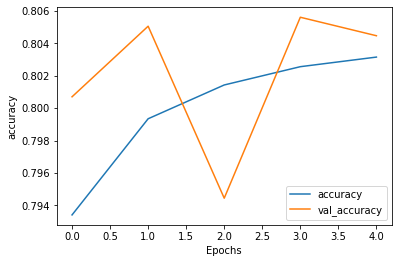

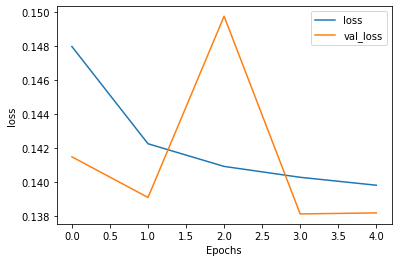

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history_sequence, "accuracy")
plot_graphs(history_sequence, "loss")

In [ ]:
# confusion matrix for model_sequence (train)

labels = padded_y_dev_sequence
predictions = model_sequence.predict(padded_x_dev_sequence)
pred = np.argmax(predictions, axis=1)

confusion_matrix(pred, labels)

array([[1709,  612,  316,   11,   27],
       [ 518, 1250,  112,    0,    0],
       [ 273,  561, 8661, 1555,    7],
       [   1,    0,  439, 7946,  620],
       [  74,    2,   31,  465, 3742]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

print(precision_recall_fscore_support(pred, labels, average = "weighted"))
print(accuracy_score(pred, labels))


(0.8159677402913581, 0.8056131618968616, 0.80775462496255, None)
0.8056131618968616


In [ ]:
# confusion matrix for model_sequence (dev)

labels = padded_y_dev_sequence
predictions = model_sequence.predict(padded_x_dev_sequence)
pred = np.argmax(predictions, axis=1)

confusion_matrix(pred, labels)

array([[1709,  612,  316,   11,   27],
       [ 518, 1250,  112,    0,    0],
       [ 273,  561, 8661, 1555,    7],
       [   1,    0,  439, 7946,  620],
       [  74,    2,   31,  465, 3742]])

In [ ]:
# model for single sentence
batch_size = 64
vocab_size = 10392  # vocab is number of unique characters
embedding_dim = 256
rnn_units = 1024

model1 = tf.keras.Sequential([

    tf.keras.layers.Embedding(15000+1, 10, input_length = 100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#    tf.keras.layers.LSTM(200, input_shape=(100, 100)),
    tf.keras.layers.Dense(100, activation = 'tanh'),
    tf.keras.layers.Dense(50, activation = 'relu'),

#     tf.keras.layers.Dense(5, activation = 'sigmoid')
    tf.keras.layers.Dense(6, activation='sigmoid'),
    
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model1.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])


In [ ]:
num_epochs = 10

checkpoint_path = "training_biLSTM/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_accuracy',
                                                 mode='max',
                                                 save_best_only=True)


history_sequence = model1.fit(padded_x_train, b,
         epochs = num_epochs,
         validation_data = (padded_x_dev, b_),
         batch_size=200, callbacks=[cp_callback])
model1.load_weights(checkpoint_path)

Epoch 1/10
11060/11060 [==============================] - 223s 18ms/step - loss: 0.1518 - accuracy: 0.8108 - val_loss: 0.1229 - val_accuracy: 0.8492
Epoch 2/10
11060/11060 [==============================] - 194s 17ms/step - loss: 0.1230 - accuracy: 0.8512 - val_loss: 0.1219 - val_accuracy: 0.8504
Epoch 3/10
11060/11060 [==============================] - 196s 18ms/step - loss: 0.1208 - accuracy: 0.8541 - val_loss: 0.1227 - val_accuracy: 0.8509
Epoch 4/10
11060/11060 [==============================] - 196s 18ms/step - loss: 0.1204 - accuracy: 0.8548 - val_loss: 0.1272 - val_accuracy: 0.8436
Epoch 5/10
11060/11060 [==============================] - 196s 18ms/step - loss: 0.1242 - accuracy: 0.8499 - val_loss: 0.1284 - val_accuracy: 0.8452
Epoch 6/10
11060/11060 [==============================] - 195s 18ms/step - loss: 0.1243 - accuracy: 0.8496 - val_loss: 0.1249 - val_accuracy: 0.8499
Epoch 7/10
11060/11060 [==============================] - 196s 18ms/step - loss: 0.1231 - accuracy: 0.8513

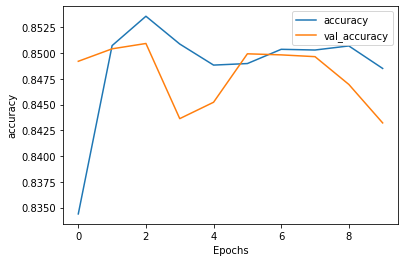

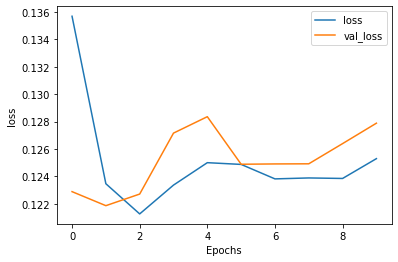

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history_sequence, "accuracy")
plot_graphs(history_sequence, "loss")

In [ ]:
# confusion matrix for single sentence model (dev)

labels = padded_y_dev
predictions = model1.predict(padded_x_dev)
pred = np.argmax(predictions, axis=1)
confusion_matrix(pred, labels)

array([[1522,  501,   56,    9,  139],
       [ 422, 1572,   75,    5,   10],
       [ 140,  150, 8962,  600,   57],
       [  16,   15,  402, 8815,  442],
       [ 475,  187,   64,  548, 3748]])

In [ ]:
print(precision_recall_fscore_support(pred, labels, average = "weighted"))
print(accuracy_score(pred, labels))


(0.8572012533753616, 0.8509263099682013, 0.8527382698459841, None)
0.8509263099682013


In [ ]:
# trade off model

labels = padded_y_dev
prediction_single_train = model1.predict(padded_x_train)
prediction_sequence_train = model_sequence.predict(padded_x_train_sequence)
prediction_single = model1.predict(padded_x_dev)
prediction_sequence = model_sequence.predict(padded_x_dev_sequence)


In [ ]:
integrate_x_train = np.concatenate((prediction_single_train, prediction_sequence_train), axis=1)
integrate_x_dev = np.concatenate((prediction_single, prediction_sequence), axis=1)

In [ ]:
integrate_x_dev.shape

(28932, 12)

In [ ]:
b_.shape

(28932, 6)

In [ ]:
n_features = integrate_x_train.shape[1]

model_integrate_new= tf.keras.Sequential([
tf.keras.layers.Dense(12, activation='tanh', kernel_initializer='he_normal', input_shape=(12,)),
tf.keras.layers.Dense(12, activation='relu', kernel_initializer='he_normal', input_shape=(12,)),
tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'),
# tf.keras.layers.Dense(5, activation='sigmoid'),
tf.keras.layers.Dense(6, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model_integrate_new.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])


In [ ]:
checkpoint_path = "training_integrate/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_accuracy',
                                                 mode='max',
                                                 save_best_only=True)


In [ ]:
num_epochs = 3
history_sequence = model_integrate_new.fit(integrate_x_train, b,
         epochs = num_epochs,
         validation_data = (integrate_x_dev, b_),
           batch_size=10, callbacks=[cp_callback])


Epoch 1/3
221187/221187 [==============================] - 488s 2ms/step - loss: 0.0581 - accuracy: 0.9350 - val_loss: 0.0588 - val_accuracy: 0.9326
Epoch 2/3
221187/221187 [==============================] - 490s 2ms/step - loss: 0.0578 - accuracy: 0.9352 - val_loss: 0.0586 - val_accuracy: 0.9325
Epoch 3/3
221187/221187 [==============================] - 450s 2ms/step - loss: 0.0576 - accuracy: 0.9354 - val_loss: 0.0592 - val_accuracy: 0.9318


In [ ]:
model_integrate_new.load_weights(checkpoint_path)

In [ ]:
labels = padded_y_dev
predictions = model_integrate_new.predict(integrate_x_dev)
pred = np.argmax(predictions, axis=1)
confusion_matrix(pred, labels)

array([[2316,  550,   69,    5,   27],
       [ 199, 1793,   47,    2,    0],
       [  46,   79, 9163,  276,   11],
       [   0,    1,  270, 9555,  203],
       [  14,    2,   10,  139, 4155]])

In [ ]:
print(precision_recall_fscore_support(pred, labels, average = "weighted"))
print(accuracy_score(pred, labels))


(0.9347419259531695, 0.9326005806719203, 0.9328050941655954, None)
0.9326005806719203


In [ ]:
model_integrate_new.load_weights(checkpoint_path)